In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import matplotlib.font_manager as fm

In [29]:
# 파일 읽기 (인코딩 지정)
df_security_light = pd.read_csv('/content/drive/MyDrive/dacon/daegu/대구 보안등 정보.csv', encoding='cp949')
df_cctv = pd.read_csv('/content/drive/MyDrive/dacon/daegu/대구 CCTV 정보.csv', encoding='cp949')
df_parking = pd.read_csv('/content/drive/MyDrive/dacon/daegu/대구 주차장 정보.csv', encoding='cp949')
df_child_protection = pd.read_csv('/content/drive/MyDrive/dacon/daegu/대구 어린이 보호 구역 정보.csv', encoding='cp949')
df_countrywide = pd.read_csv('/content/drive/MyDrive/dacon/daegu/countrywide_accident.csv', encoding='utf-8-sig')
df_train = pd.read_csv('/content/drive/MyDrive/dacon/daegu/train.csv', encoding='utf-8-sig')
df_test = pd.read_csv('/content/drive/MyDrive/dacon/daegu/test.csv', encoding='utf-8-sig')

<ipython-input-29-624b7d69d407>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_security_light = pd.read_csv('/content/drive/MyDrive/dacon/daegu/대구 보안등 정보.csv', encoding='cp949')


In [30]:
df_security_light.head(1)

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주


In [31]:
df_cctv.head(1)

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0


In [32]:
df_parking.head(1)

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01


In [33]:
df_child_protection.head(1)

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23


In [34]:
df_countrywide.head(1)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3


In [78]:
df_train.tail(1)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연도,월,시간
39608,ACCIDENT_39608,2021-12-31 23:00:00,금요일,맑음,대구광역시 서구 비산동,단일로 - 지하차도(도로)내,건조,차대차,측면충돌,안전운전불이행,...,33세,경상,0,0,2,0,6,2021,12,23


In [35]:
df_test.head(1)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람


 df_countrywide는 전국의 데이터, df_train은 대구의 데이터
 우선 df_train부터 확인하기로 함

In [39]:
# 데이터 개요 파악
print(f"데이터셋 크기: {df_train.shape}")

print("\n각 열의 데이터 타입:")
print(df_train.dtypes)

print("\n각 열의 결측치 비율 (%):")
missing_ratio = df_train.isnull().sum() / len(df_train) * 100
print(missing_ratio)

print(f"\n중복된 행의 수: {df_train.duplicated().sum()}")

print("\n각 열의 유니크 값 개수:")
print(df_train.nunique())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(df_train.head())

# 기술 통계량 확인
print("\n수치형 열의 기술 통계량:")
print(df_train.describe())

# 범주형 열의 값 분포
categorical_columns = df_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}의 값 분포:")
    print(df_train[col].value_counts(normalize=True))

데이터셋 크기: (39609, 23)

각 열의 데이터 타입:
ID             object
사고일시           object
요일             object
기상상태           object
시군구            object
도로형태           object
노면상태           object
사고유형           object
사고유형 - 세부분류    object
법규위반           object
가해운전자 차종       object
가해운전자 성별       object
가해운전자 연령       object
가해운전자 상해정도     object
피해운전자 차종       object
피해운전자 성별       object
피해운전자 연령       object
피해운전자 상해정도     object
사망자수            int64
중상자수            int64
경상자수            int64
부상자수            int64
ECLO            int64
dtype: object

각 열의 결측치 비율 (%):
ID             0.000000
사고일시           0.000000
요일             0.000000
기상상태           0.000000
시군구            0.000000
도로형태           0.000000
노면상태           0.000000
사고유형           0.000000
사고유형 - 세부분류    0.000000
법규위반           0.000000
가해운전자 차종       0.000000
가해운전자 성별       0.000000
가해운전자 연령       0.000000
가해운전자 상해정도     0.000000
피해운전자 차종       2.501957
피해운전자 성별       2.501957
피해운전자 연령       2.501957
피해운전자 상해정도     2.50

In [79]:
# 데이터 개요 파악
print(f"데이터셋 크기: {df_countrywide.shape}")

print("\n각 열의 데이터 타입:")
print(df_countrywide.dtypes)

print("\n각 열의 결측치 비율 (%):")
missing_ratio = df_countrywide.isnull().sum() / len(df_countrywide) * 100
print(missing_ratio)

print(f"\n중복된 행의 수: {df_countrywide.duplicated().sum()}")

print("\n각 열의 유니크 값 개수:")
print(df_countrywide.nunique())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(df_countrywide.head())

# 기술 통계량 확인
print("\n수치형 열의 기술 통계량:")
print(df_countrywide.describe())

# 범주형 열의 값 분포
categorical_columns = df_countrywide.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}의 값 분포:")
    print(df_countrywide[col].value_counts(normalize=True).head(10))  # 상위 10개만 출력

데이터셋 크기: (602775, 23)

각 열의 데이터 타입:
ID             object
사고일시           object
요일             object
기상상태           object
시군구            object
도로형태           object
노면상태           object
사고유형           object
사고유형 - 세부분류    object
법규위반           object
가해운전자 차종       object
가해운전자 성별       object
가해운전자 연령       object
가해운전자 상해정도     object
피해운전자 차종       object
피해운전자 성별       object
피해운전자 연령       object
피해운전자 상해정도     object
사망자수            int64
중상자수            int64
경상자수            int64
부상자수            int64
ECLO            int64
dtype: object

각 열의 결측치 비율 (%):
ID             0.000000
사고일시           0.000000
요일             0.000000
기상상태           0.000000
시군구            0.000000
도로형태           0.000000
노면상태           0.000166
사고유형           0.000000
사고유형 - 세부분류    0.000000
법규위반           0.000000
가해운전자 차종       0.000000
가해운전자 성별       0.000000
가해운전자 연령       0.000000
가해운전자 상해정도     0.000000
피해운전자 차종       4.284683
피해운전자 성별       4.285015
피해운전자 연령       4.284517
피해운전자 상해정도     4.2

흝어보고 의아했던 데이터

각 열의 유니크 값 개수:
- 가해/피해 운전자 성별           3?

- 사망자수               3		아마도 1,2,3명이 사망하였겠구나 유추가능

- 경상자수              18           높은 숫자인걸 보니 매우 큰 사고가 났고 여기서 중상,사망자가 나왔을 수도 있겠고
ECLO에 큰 영향을 미쳤을 것 같다

- 수치형 열의 기술 통계량:
               사망자수          중상자수          경상자수          부상자수          ECLO
count  39609.000000  39609.000000  39609.000000  39609.000000  39609.000000
mean       0.007776      0.262365      1.070085      0.126865      4.726704
std        0.090109      0.500845      0.992034      0.394670      3.207206
min        0.000000      0.000000      0.000000      0.000000      1.000000
25%        0.000000      0.000000      0.000000      0.000000      3.000000
50%        0.000000      0.000000      1.000000      0.000000      3.000000
75%        0.000000      0.000000      1.000000      0.000000      6.000000
max        2.000000      6.000000     22.000000     10.000000     74.000000

- 사망자수 max 2? 아 1,2,3명이 아니라 0,1,2명 사망이구나

- 경상자수 max 22명 저게 가장 컸겠구나 아마 ECLO 74사건은 저 사건이지않을까? 이따 한번 서치해봐야겠다
ECLO 74면 저 사건 하나로 값이 드라마틱하게 변했지 않을까?

- ECLO의 min이 1인 이유는? 사건이 일어나야 ECLO를 집계하니까 최소 -> 부상 = 1

- 대구 기상상태의 값 분포:
맑음    0.913454
비     0.066323
흐림    0.018405
기타    0.001414
안개    0.000202
눈     0.000202

- 대구 노면상태의 값 분포:
건조       0.919488
젖음/습기    0.078265
기타       0.001464
서리/결빙    0.000631
침수       0.000076
적설       0.000076

- 전국 기상상태의 값 분포:
맑음    0.884970
비     0.067805
흐림    0.033556
기타    0.008668
눈     0.004013
안개    0.000987

- 전국 노면상태의 값 분포:
건조       0.896902
젖음/습기    0.088315
기타       0.009042
서리/결빙    0.003623
적설       0.001963
침수       0.000111
해빙       0.000045

- 눈과 적설의 값이 전국의 값이 대구보다 훨씬 큼
-> 대구는 눈이 쌓이지 않아 그렇구나 유추가능

- 피해운전자 연령의 값 상위분포:
59세       0.022451
57세       0.021855
26세       0.021130
50세       0.021104
58세       0.020949

왜 다 50대인데 26세만 튀어나와있지?
취직하고 나서 학생때보다 운전을 많이해서 그런가?

- 시군구의 값 분포:
시군구
대구광역시 남구 대명동      0.044157
대구광역시 수성구 범어동     0.029614
대구광역시 달서구 상인동     0.028857
대구광역시 서구 비산동      0.024439
대구광역시 서구 내당동      0.023681
                    ...   
대구광역시 중구 도원동      0.000050
대구광역시 동구 신용동      0.000050
대구광역시 중구 동성로1가    0.000050
대구광역시 북구 도남동      0.000050
대구광역시 동구 평광동      0.000025

이게 말이되나? 한 지역이 어마어마하게 크나? 인구수가 차이가 심한가?


In [80]:
# 결측치 처리
df_train = df_train.dropna()  # 결측치가 있는 행 제거

# 시간적 분포 분석을 위한 데이터 전처리
df_train['사고일시'] = pd.to_datetime(df_train['사고일시'])
df_train['연도'] = df_train['사고일시'].dt.year
df_train['월'] = df_train['사고일시'].dt.month
df_train['시간'] = df_train['사고일시'].dt.hour

In [96]:
def plot_accident_and_eclo(x, data, title, xlabel, rotation=0):
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 데이터 준비
    count_data = data[x].value_counts().sort_index()
    eclo_data = data.groupby(x)['ECLO'].mean().sort_index()

    # 사고 건수 (막대 그래프)
    sns.barplot(x=count_data.index, y=count_data.values, ax=ax1, color='b', alpha=0.5)
    ax1.set_ylabel('사고 건수', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # ECLO 평균 (선 그래프)
    ax2 = ax1.twinx()
    ax2.plot(eclo_data.index, eclo_data.values, color='r', marker='o')
    ax2.set_ylabel('평균 ECLO 점수', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title(title)
    ax1.set_xlabel(xlabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

<ipython-input-82-01926348b206>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시군구', y='사고건수', data=plot_data, ax=ax1,


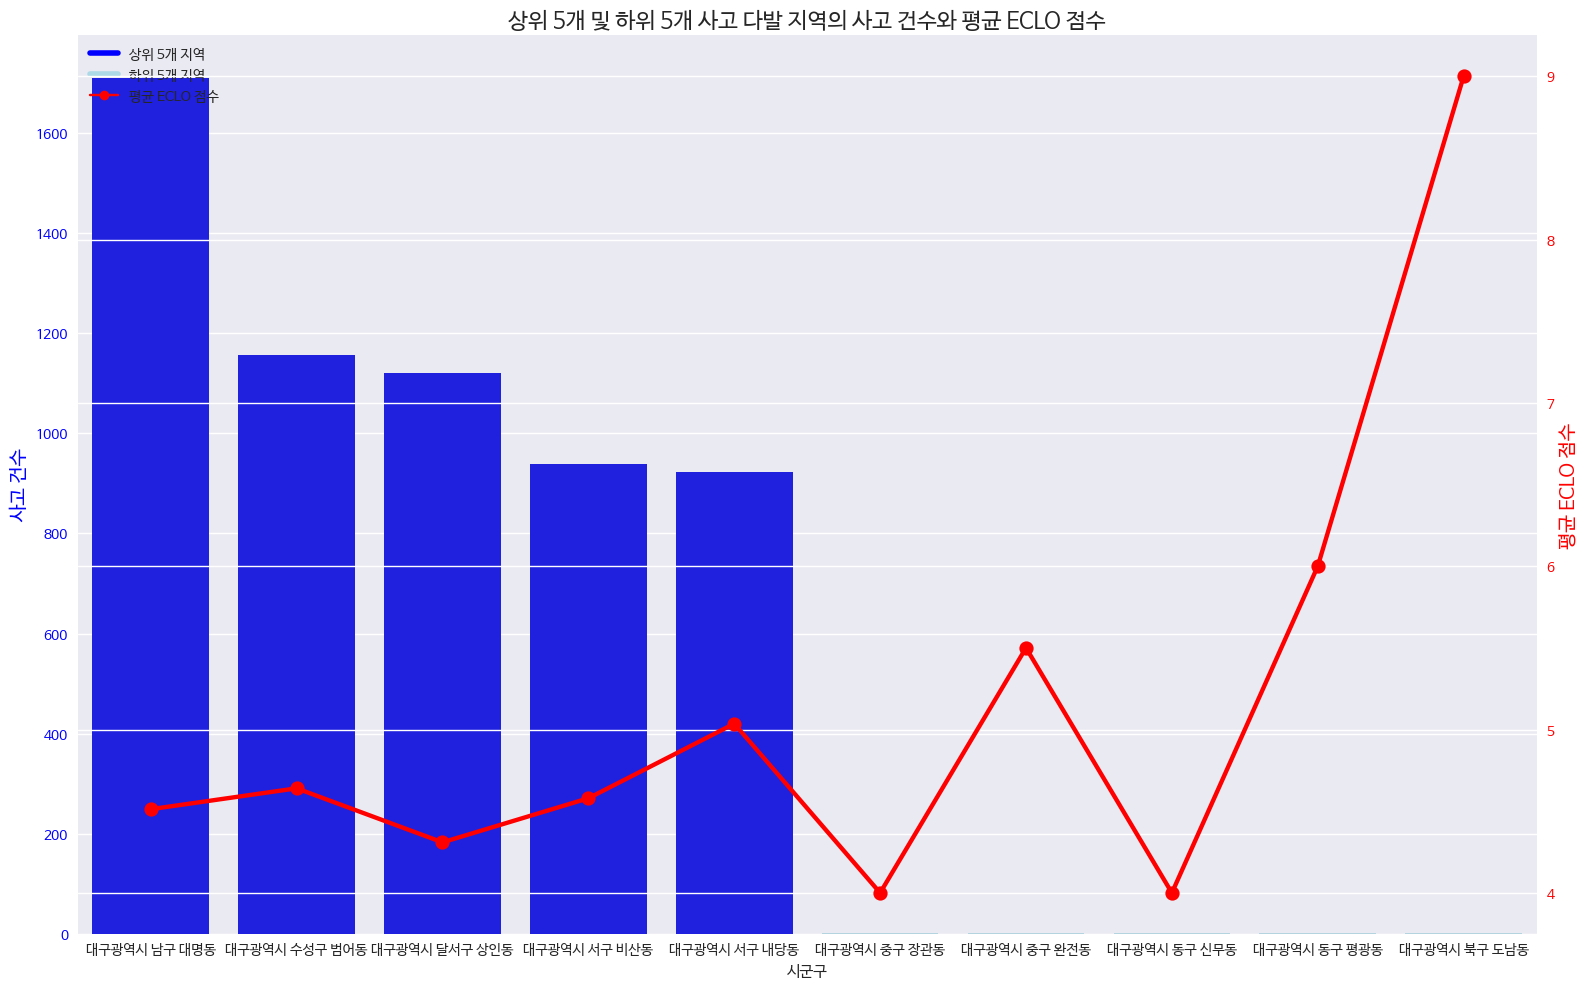

In [82]:
# 상위 5개와 하위 5개 사고 다발 지역 선정
top_5_regions = df_train['시군구'].value_counts().nlargest(5).index
bottom_5_regions = df_train['시군구'].value_counts().nsmallest(5).index

# 데이터 준비
df_top_5 = df_train[df_train['시군구'].isin(top_5_regions)].copy()
df_bottom_5 = df_train[df_train['시군구'].isin(bottom_5_regions)].copy()

df_top_5['구분'] = '상위 5개 지역'
df_bottom_5['구분'] = '하위 5개 지역'

df_combined = pd.concat([df_top_5, df_bottom_5])

# 사고 건수 계산
accident_counts = df_combined['시군구'].value_counts().reset_index()
accident_counts.columns = ['시군구', '사고건수']

# ECLO 평균 계산
eclo_means = df_combined.groupby('시군구')['ECLO'].mean().reset_index()
eclo_means.columns = ['시군구', 'ECLO_평균']

# 데이터 병합
plot_data = pd.merge(accident_counts, eclo_means, on='시군구')
plot_data = pd.merge(plot_data, df_combined[['시군구', '구분']].drop_duplicates(), on='시군구')

# 시군구 기준으로 정렬
plot_data = plot_data.sort_values('사고건수', ascending=False)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(16, 10))

# 사고 건수 (막대 그래프)
sns.barplot(x='시군구', y='사고건수', data=plot_data, ax=ax1,
            palette=['blue' if x == '상위 5개 지역' else 'lightblue' for x in plot_data['구분']])
ax1.set_ylabel('사고 건수', color='b', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# ECLO 평균 (선 그래프)
ax2 = ax1.twinx()
sns.pointplot(x='시군구', y='ECLO_평균', data=plot_data, color='r', ax=ax2)
ax2.set_ylabel('평균 ECLO 점수', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# 그래프 제목 및 레이블 설정
plt.title('상위 5개 및 하위 5개 사고 다발 지역의 사고 건수와 평균 ECLO 점수', fontsize=16)
plt.xlabel('지역', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 범례 추가
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', lw=4, label='상위 5개 지역'),
                   Line2D([0], [0], color='lightblue', lw=4, label='하위 5개 지역'),
                   Line2D([0], [0], color='r', marker='o', label='평균 ECLO 점수')]
ax1.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

In [83]:
# 대구광역시 남구 대명동의 사고 건수
daemyeong_count = df_train[df_train['시군구'] == '대구광역시 남구 대명동'].shape[0]
print(f"대구광역시 남구 대명동 사고 건수: {daemyeong_count}")

# 대구광역시 중구 장관동의 사고 건수
janggwan_count = df_train[df_train['시군구'] == '대구광역시 중구 장관동'].shape[0]
print(f"대구광역시 중구 장관동 사고 건수: {janggwan_count}")

# 전체 지역의 사고 건수 확인
region_counts = df_train['시군구'].value_counts()
print("\n상위 10개 사고 다발 지역:")
print(region_counts.head(10))
print("\n하위 10개 사고 발생 지역:")
print(region_counts.tail(10))

# 전체 고유 지역 수
unique_regions = df_train['시군구'].nunique()
print(f"\n전체 고유 지역 수: {unique_regions}")

대구광역시 남구 대명동 사고 건수: 1710
대구광역시 중구 장관동 사고 건수: 2

상위 10개 사고 다발 지역:
시군구
대구광역시 남구 대명동     1710
대구광역시 수성구 범어동    1156
대구광역시 달서구 상인동    1121
대구광역시 서구 비산동      939
대구광역시 서구 내당동      922
대구광역시 수성구 만촌동     887
대구광역시 서구 평리동      866
대구광역시 북구 산격동      852
대구광역시 달서구 송현동     796
대구광역시 동구 신암동      792
Name: count, dtype: int64

하위 10개 사고 발생 지역:
시군구
대구광역시 동구 내동       3
대구광역시 중구 장관동      2
대구광역시 중구 완전동      2
대구광역시 동구 신무동      2
대구광역시 중구 도원동      2
대구광역시 중구 화전동      2
대구광역시 동구 신용동      2
대구광역시 중구 동성로1가    2
대구광역시 동구 평광동      1
대구광역시 북구 도남동      1
Name: count, dtype: int64

전체 고유 지역 수: 199


이게 말이되나? 그래프를 잘못 그렸나 싶어 데이터로도 확인해봤는데 너무 차이가 심한데 이유가 뭐지?  
<br>
예측 1) 데이터가 19년도부터 21년도까지 였다 보니 지명이 바뀌었다.  
예측 2) 경찰관이 사건을 집계할때 공식지명을 사용하지않고 사람들이 사용하는 지명으로 기입했다.

근데 사실 이 데이콘에는 인구수나 지역크기같은 데이터가 없어서 확인할 길이 없었다.
사실 그냥 넘어가도 되긴한데 이 의문을 해결하지 못하면 너무 답답할 것 같아 다른 공공데이터를 참고했다.






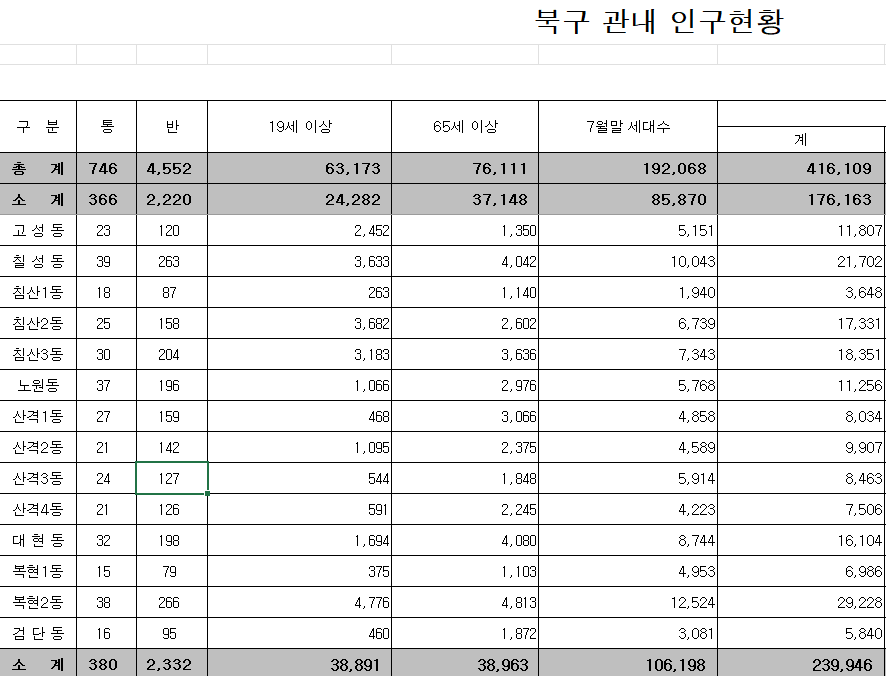

위 엑셀등 다른 데이터들을 확인해보니 하위 10개 지명들은 나오지가 않았다.

그래서 하위 10개 데이터들이 옛 지명이라 그런가? 확인해보니 2021년도에도 나오네?
 그럼 예측1은 틀린 것 같고 그래서 네이버나 구글에 검색해봤는데 나오긴하는데 조금 양이 적은느낌..? 그래서 확실하진 않은데 아마 예측2이지 않을까 싶다. 약간 옛날 지명이나 전통적인 지명을 기입한느낌.

그리고 확인하면서 위 사진을 보면 알겠지만 침산1,2,3동 이렇게 분류되어있는걸 볼 수 있었는데 상위 10개지명들은 모두 그런 지명을 대명1~11동을 모두 대명동으로 기입했기에 다른 지역들보다 큰 분포를 나타냄을 확인할 수 있었다.

In [84]:
import pandas as pd

# 하위 10개 사고 발생 지역 리스트
low_accident_regions = [
    '대구광역시 동구 내동', '대구광역시 중구 장관동', '대구광역시 중구 완전동',
    '대구광역시 동구 신무동', '대구광역시 중구 도원동', '대구광역시 중구 화전동',
    '대구광역시 동구 신용동', '대구광역시 중구 동성로1가', '대구광역시 동구 평광동',
    '대구광역시 북구 도남동'
]

# 각 지역별 사고일시 추출
for region in low_accident_regions:
    accidents = df_train[df_train['시군구'] == region]
    print(f"\n{region} 사고일시:")
    for _, accident in accidents.iterrows():
        print(accident['사고일시'])

# 전체 요약 정보
print("\n\n전체 요약:")
for region in low_accident_regions:
    accidents = df_train[df_train['시군구'] == region]
    print(f"{region}: {len(accidents)}건")


대구광역시 동구 내동 사고일시:
2019-09-04 22:00:00
2019-12-22 10:00:00
2021-08-31 18:00:00

대구광역시 중구 장관동 사고일시:
2019-01-31 11:00:00
2020-11-03 14:00:00

대구광역시 중구 완전동 사고일시:
2019-08-02 19:00:00
2019-10-02 16:00:00

대구광역시 동구 신무동 사고일시:
2020-04-15 19:00:00
2021-10-01 12:00:00

대구광역시 중구 도원동 사고일시:
2019-07-24 05:00:00
2020-06-05 21:00:00

대구광역시 중구 화전동 사고일시:
2020-09-28 18:00:00
2021-05-30 15:00:00

대구광역시 동구 신용동 사고일시:
2020-11-07 12:00:00
2020-11-15 12:00:00

대구광역시 중구 동성로1가 사고일시:
2021-07-04 13:00:00
2021-12-22 18:00:00

대구광역시 동구 평광동 사고일시:
2021-07-11 17:00:00

대구광역시 북구 도남동 사고일시:
2021-11-26 13:00:00


전체 요약:
대구광역시 동구 내동: 3건
대구광역시 중구 장관동: 2건
대구광역시 중구 완전동: 2건
대구광역시 동구 신무동: 2건
대구광역시 중구 도원동: 2건
대구광역시 중구 화전동: 2건
대구광역시 동구 신용동: 2건
대구광역시 중구 동성로1가: 2건
대구광역시 동구 평광동: 1건
대구광역시 북구 도남동: 1건


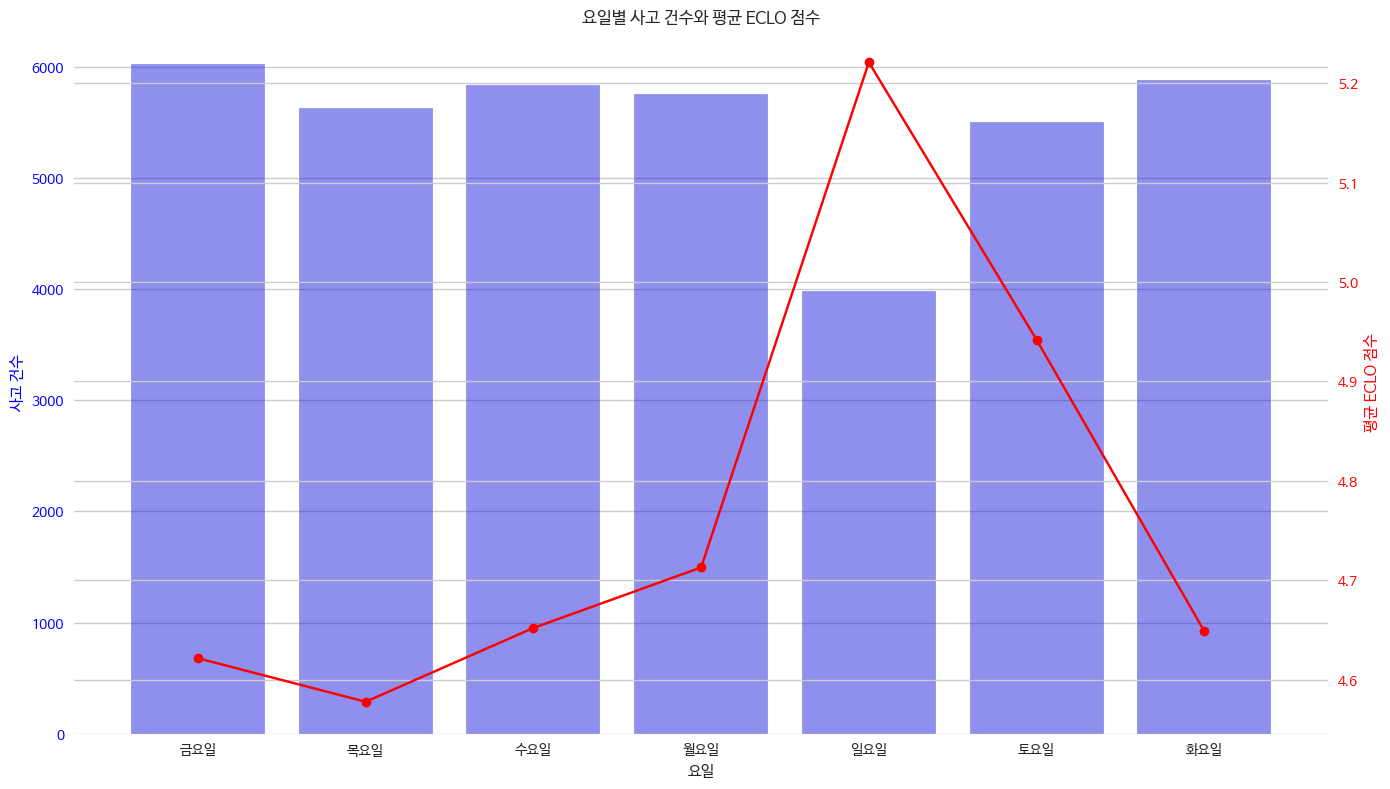

In [97]:
# 요일별 사고 건수와 ECLO 평균
plot_accident_and_eclo('요일', df_train, '요일별 사고 건수와 평균 ECLO 점수', '요일', rotation=45)

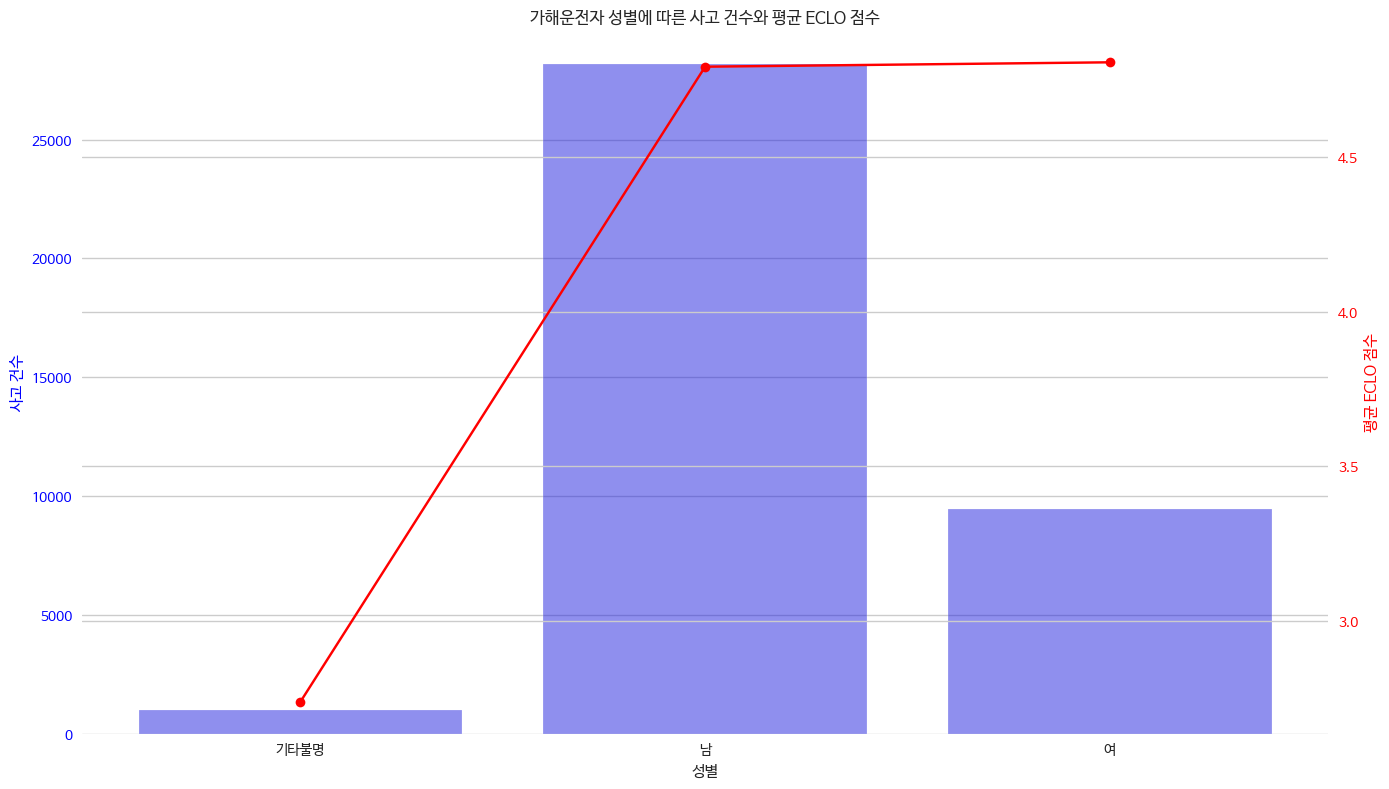

In [98]:
# 가해운전자 성별에 따른 사고 건수와 ECLO 평균
plot_accident_and_eclo('가해운전자 성별', df_train, '가해운전자 성별에 따른 사고 건수와 평균 ECLO 점수', '성별')

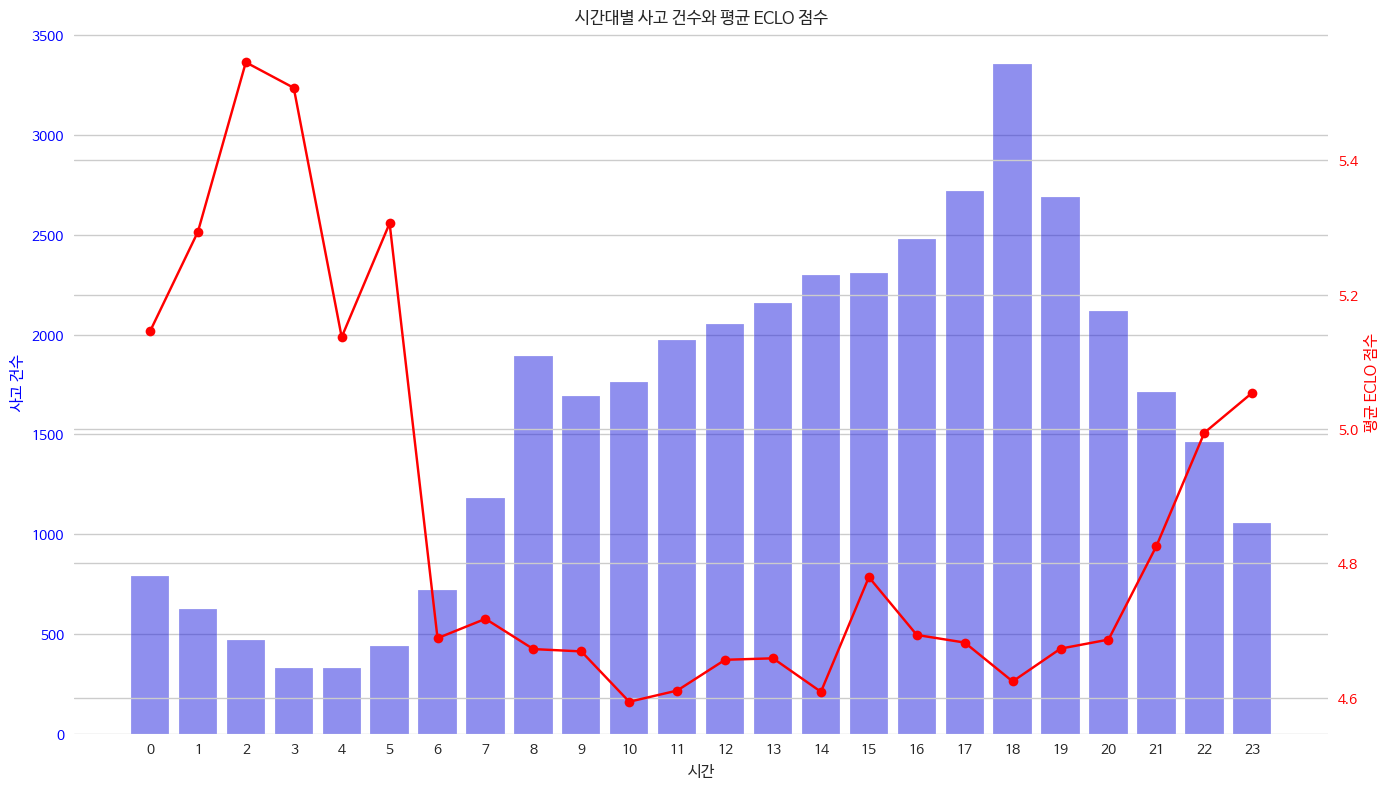

In [99]:
# 시간대별 사고 건수와 ECLO 평균
plot_accident_and_eclo('시간', df_train, '시간대별 사고 건수와 평균 ECLO 점수', '시간')

ECLO가 가장 높은 사건과 경상자수가 가장 많은 사건을 확인하고, 이들이 전체 통계에 미치는 영향을 분석

최대 ECLO 사건:
ID                  ACCIDENT_32591
사고일시           2021-06-04 14:00:00
요일                             금요일
기상상태                            맑음
시군구                   대구광역시 서구 비산동
도로형태                      단일로 - 기타
노면상태                            건조
사고유형                           차대차
사고유형 - 세부분류                     추돌
법규위반                       안전운전불이행
가해운전자 차종                        승합
가해운전자 성별                         여
가해운전자 연령                       61세
가해운전자 상해정도                    상해없음
피해운전자 차종                        승합
피해운전자 성별                         남
피해운전자 연령                       48세
피해운전자 상해정도                    상해없음
사망자수                             0
중상자수                             4
경상자수                            18
부상자수                             0
ECLO                            74
연도                            2021
월                                6
시간                              14
Name: 32591, dtype: object

최대 경상자수 사건:
ID                  ACCIDENT_37536
사고일

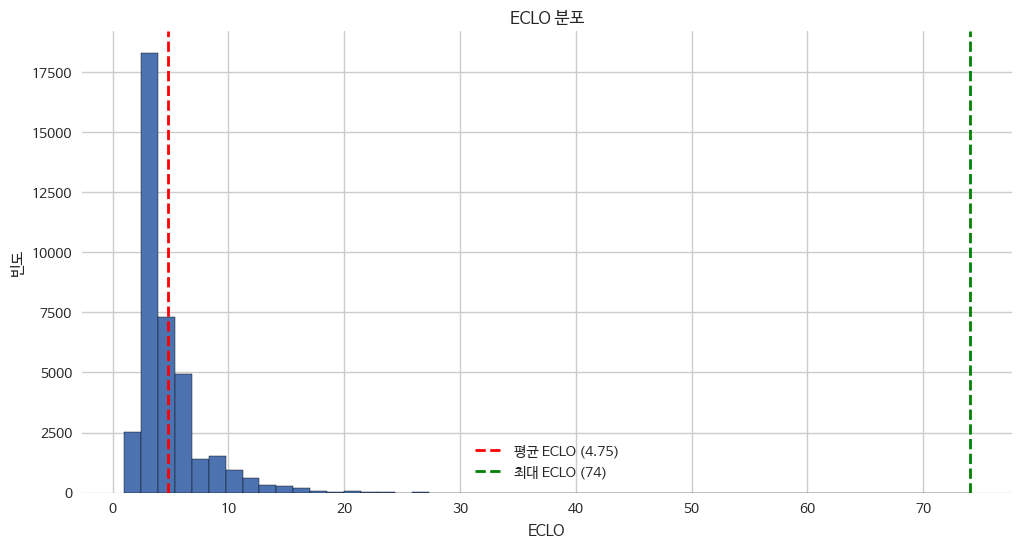


상위 10개 ECLO 사건:


,ECLO,사망자수,중상자수,경상자수,부상자수
32591,74,0,4,18,0
37536,66,0,0,22,0
12632,57,1,4,9,0
10834,56,0,4,12,0
30002,52,1,4,7,1
5358,47,0,1,14,0
29350,45,0,0,15,0
354,40,2,4,0,0
34970,39,0,0,13,0
9744,37,0,2,7,6


In [102]:
# 최대 ECLO 사건 찾기
max_eclo_case = df_train.loc[df_train['ECLO'].idxmax()]

print("최대 ECLO 사건:")
print(max_eclo_case)

# 최대 경상자수 사건 찾기
max_injured_case = df_train.loc[df_train['경상자수'].idxmax()]

print("\n최대 경상자수 사건:")
print(max_injured_case)

# 두 사건이 같은지 확인
print("\n두 사건이 같은가?", max_eclo_case.name == max_injured_case.name)

# 전체 평균 ECLO 계산
mean_eclo = df_train['ECLO'].mean()

# 최대 ECLO 사건을 제외한 평균 ECLO 계산
mean_eclo_without_max = df_train[df_train['ECLO'] != df_train['ECLO'].max()]['ECLO'].mean()

print(f"\n전체 평균 ECLO: {mean_eclo:.2f}")
print(f"최대 ECLO 사건 제외 평균 ECLO: {mean_eclo_without_max:.2f}")
print(f"차이: {mean_eclo - mean_eclo_without_max:.2f}")

# ECLO 분포 시각화
plt.figure(figsize=(12, 6))
plt.hist(df_train['ECLO'], bins=50, edgecolor='black')
plt.title('ECLO 분포')
plt.xlabel('ECLO')
plt.ylabel('빈도')
plt.axvline(mean_eclo, color='r', linestyle='dashed', linewidth=2, label=f'평균 ECLO ({mean_eclo:.2f})')
plt.axvline(max_eclo_case['ECLO'], color='g', linestyle='dashed', linewidth=2, label=f'최대 ECLO ({max_eclo_case["ECLO"]})')
plt.legend()
plt.show()

# 상위 10개 ECLO 사건 확인
top_10_eclo = df_train.nlargest(10, 'ECLO')
print("\n상위 10개 ECLO 사건:")
top_10_eclo[['ECLO', '사망자수', '중상자수', '경상자수', '부상자수']]

둘다 차대차 사건 -> 승합차 3대에 화물차 1대

승합차란: 승차 정원이 11인 이상인 자동차

대형사고임을 확인할 수 있다

ECLO는 74,66,57,56,52 등등인데 평균 ECLO는 4.75

이러면 최대 ECLO는 평균 ECLO에
큰영향인지 작은 영향인지 확인하고 싶네


전체 데이터 수: 38232
전체 평균 ECLO: 7.9341
상위 5개 ECLO 값: [74, 66, 57, 56, 52]

상위 5개 ECLO 제거 후 평균: 7.9271
평균 변화: 0.0069
평균 변화 비율: 0.0875%

상위 1% ECLO 값의 평균: 50.6492
상위 1% 제외 나머지의 평균: 7.5019

상위 1% ECLO 제거 후 평균: 7.4929
평균 변화: 0.4412
평균 변화 비율: 5.5609%

ECLO 분포 요약:
count    38232.000000
mean         7.934087
std         13.041381
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         74.000000
Name: ECLO, dtype: float64

백분위수:
25th 백분위수: 1.0000
50th 백분위수: 1.0000
75th 백분위수: 3.0000
90th 백분위수: 32.0000
95th 백분위수: 42.0000
99th 백분위수: 50.0000


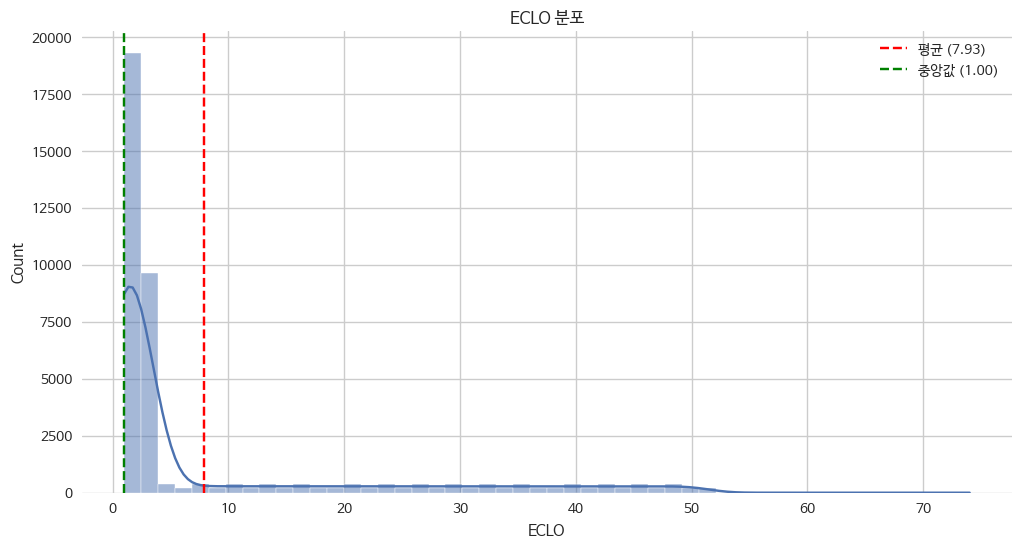

In [108]:
# 전체 평균 ECLO 계산
mean_eclo = df_train['ECLO'].mean()

# 상위 5개 ECLO 값
top_5_eclo = df_train['ECLO'].nlargest(5)

print(f"전체 데이터 수: {len(df_train)}")
print(f"전체 평균 ECLO: {mean_eclo:.4f}")
print(f"상위 5개 ECLO 값: {top_5_eclo.tolist()}")

# 상위 5개 ECLO를 제거한 후의 평균 계산
mean_eclo_without_top_5 = df_train[~df_train['ECLO'].isin(top_5_eclo)]['ECLO'].mean()

print(f"\n상위 5개 ECLO 제거 후 평균: {mean_eclo_without_top_5:.4f}")
print(f"평균 변화: {mean_eclo - mean_eclo_without_top_5:.4f}")
print(f"평균 변화 비율: {((mean_eclo - mean_eclo_without_top_5) / mean_eclo) * 100:.4f}%")

print(f"\n상위 1% ECLO 값의 평균: {df_train['ECLO'].nlargest(int(len(df_train)*0.01)).mean():.4f}")
print(f"상위 1% 제외 나머지의 평균: {df_train['ECLO'].nsmallest(int(len(df_train)*0.99)).mean():.4f}")

# 상위 1% ECLO 값의 영향 분석
one_percent = int(len(df_train) * 0.01)
top_1_percent_eclo = df_train['ECLO'].nlargest(one_percent)

mean_eclo_without_top_1_percent = df_train[~df_train['ECLO'].isin(top_1_percent_eclo)]['ECLO'].mean()

print(f"\n상위 1% ECLO 제거 후 평균: {mean_eclo_without_top_1_percent:.4f}")
print(f"평균 변화: {mean_eclo - mean_eclo_without_top_1_percent:.4f}")
print(f"평균 변화 비율: {((mean_eclo - mean_eclo_without_top_1_percent) / mean_eclo) * 100:.4f}%")

# ECLO 값의 분포 요약
print("\nECLO 분포 요약:")
print(df_train['ECLO'].describe())

print("\n백분위수:")
for p in [25, 50, 75, 90, 95, 99]:
    print(f"{p}th 백분위수: {df_train['ECLO'].quantile(p/100):.4f}")

# 데이터 준비 (실제 데이터가 없으므로 예시 데이터 생성)
df_train = pd.DataFrame({'ECLO': [1] * 19309 + [3] * 9654 + list(range(4, 52)) * 193 + [52, 56, 57, 66, 74]})

# 1. ECLO 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='ECLO', kde=True, bins=50)
plt.title('ECLO 분포')
plt.axvline(df_train['ECLO'].mean(), color='r', linestyle='--', label=f'평균 ({df_train["ECLO"].mean():.2f})')
plt.axvline(df_train['ECLO'].median(), color='g', linestyle='--', label=f'중앙값 ({df_train["ECLO"].median():.2f})')
plt.legend()
plt.show()

**ECLO의 극단값들은 평균에 어느 정도 영향을 미치지만, 그 영향은 제한적임.**

 **대부분의 사고가 낮은 ECLO 값을 가지며, 극소수의 매우 심각한 사고가 전체 평균을 약간 높이는 효과를 보임.**

**빈번히 발생하는 경미한 사고와 드물지만 매우 심각한 사고 모두에 대한 고려가 필요해 보임**